In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from google.colab import drive
#Mount Google Drive and load dataset
drive.mount("/content/gdrive")
#data_path1 = '/content/gdrive/MyDrive/FYDP-2_DATA&Code/Separate_Data/Kidnapping.xlsx'

Mounted at /content/gdrive


[0.0, 0.10626903238950725, 0.21602873399212139, 0.3292830755915168, 0.4420509961907922, 0.5511716935912077, 0.6653064980765349, 0.7826429220810199, 0.8930070003164364, 1.0]
[0.0, 0.34782608695652173, 0.34782608695652173, 0.13043478260869565, 0.13043478260869565, 0.391304347826087, 0.6086956521739131, 0.391304347826087, 0.7391304347826086, 1.0]
[0.9427917620137299, 0.8535469107551488, 0.919908466819222, 0.9530892448512586, 1.0, 0.868421052631579, 0.6784897025171625, 0.5297482837528604, 0.45537757437070936, 0.0]
[0.9103122429312377, 0.8024264261845127, 0.783802982818174, 0.8207457447415846, 0.8016118827489207, 0.7157058735243349, 0.6401809286831812, 0.6764310645391199, 0.5678504221571178, 0.4823054293834873]


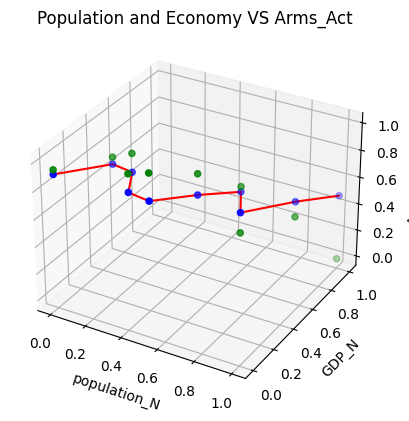

In [ ]:
i = 0
W0 = 0
W1 = 0
W2 = 0
GDP_square_sum = 0
GDP_sum = 0
population_square_sum =0
population_sum = 0
Arms_Act_sum = 0
population_and_armsact = 0
population_and_GDP_sum = 0
GDP_and_armsact = 0
summation_population_and_arms_act = 0
summation_population_and_GDP = 0
summation_GDP_and_arms_act = 0
population_N = []
GDP_N = []
Arms_Act_N = []
Y_Arms_Act = []
#turn all column into separate list
df1 = pd.read_excel(data_path1, header=None)
df1.columns = ['X1', 'X2', 'Y']
population = df1['X1'].tolist()
GDP = df1['X2'].tolist()
Arms_Act = df1['Y'].tolist()
#Normalizing values for population GDP and Arms_Act
population_Min = min(population)
population_Max = max(population)
GDP_Min = min(GDP)
GDP_Max = max(GDP)
Arms_Act_Min = min(Arms_Act)
Arms_Act_Max = max(Arms_Act)
for i in range(len(population)):
    population_N.append((population[i]-population_Min)/(population_Max-population_Min))
    GDP_N.append((GDP[i]-GDP_Min)/(GDP_Max-GDP_Min))
    Arms_Act_N.append((Arms_Act[i]-Arms_Act_Min)/(Arms_Act_Max-Arms_Act_Min))
# Y = W0 + W1.X1 + W2.X2
# W0 = Y_bar - W1.X1_bar - W2.X2_bar
# W1 = (((summation_x2^2) * (summation_x1.y)) - ((summation_x1.x2) * (summation_x2.y))) / (((summation_x1^2) * (summation_x2^2)) - (summation_x1.x2)^2)
# W2 = (((summation_x1^2) * (summation_x2.y)) - ((summation_x1.x2) * (summation_x1.y))) / (((summation_x1^2) * (summation_x2^2)) - (summation_x1.x2)^2)
#Calculating W1, W2 and W3
for i in range(len(population)):
    population_square_sum = population_square_sum + population_N[i]**2
    population_sum = population_sum + population_N[i]
    GDP_square_sum = GDP_square_sum + GDP_N[i]**2
    GDP_sum = GDP_sum + GDP_N[i]
    Arms_Act_sum =  Arms_Act_sum +  Arms_Act_N[i]
    population_and_armsact =  population_and_armsact + (population_N[i]*Arms_Act_N[i])
    GDP_and_armsact = GDP_and_armsact + (GDP_N[i]*Arms_Act_N[i])
    population_and_GDP_sum = population_and_GDP_sum + (population_N[i]*GDP_N[i])
summation_population_and_arms_act = population_and_armsact - (population_sum * Arms_Act_sum) / len(GDP)
summation_population_and_GDP = population_and_GDP_sum - (population_sum * GDP_sum) / len(GDP)
summation_GDP_and_arms_act = GDP_and_armsact - (GDP_sum * Arms_Act_sum) / len(GDP)
W1 = ((GDP_square_sum * summation_population_and_arms_act) - (summation_population_and_GDP * summation_GDP_and_arms_act)) / ((population_square_sum * GDP_square_sum) - summation_population_and_GDP**2)
W2 = ((population_square_sum * summation_GDP_and_arms_act) - (summation_population_and_GDP * summation_population_and_arms_act)) / ((population_square_sum * GDP_square_sum) - summation_population_and_GDP**2)
W0 = (Arms_Act_sum / len(Arms_Act)) - W1 * (population_sum / len(population)) - W2 * (GDP_sum / len(GDP))
#calculating: Y = W0 + W1.X1 + W2.X2
for i in range(len(Arms_Act)):
    Y_Arms_Act.append(W0 + W1 * population_N[i] + W2 * GDP_N[i])
#pint values
print(population_N)
print(GDP_N)
print(Arms_Act_N)
print(Y_Arms_Act)
#plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(population_N, GDP_N, Arms_Act_N, c='g', marker='o')
ax.scatter(population_N, GDP_N, Y_Arms_Act, c='b', marker='o')
for i in range(len(population_N)-1):
    ax.plot([population_N[i], population_N[i+1]], [GDP_N[i], GDP_N[i+1]], [Y_Arms_Act[i], Y_Arms_Act[i+1]], color='r')
ax.set_xlabel('population_N')
ax.set_ylabel('GDP_N')
ax.set_zlabel('Arms_Act_N')
ax.set_title('Population and Economy VS Arms_Act')
plt.show()